<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 3: Practical - Multi-Layer Perceptron (VAE) <br>
<font color=696880 size=4>
    Sobhan Moghimi (sobhanmoghimi45@gmail.com) <br>
    Fakhredin Abdi (fakhredinabdi80@gmail.com) <br>
    
____


### Full Name : Danial Ahangarani
### Student Number : 400211546
__

# Description

**In this assignment you'll be working with Dorothea Dataset.**

DOROTHEA is a drug discovery dataset. Chemical compounds represented by structural molecular features must be classified as active (binding to thrombin) or inactive.
To find out more about dataset, refer to this link: https://archive.ics.uci.edu/ml/datasets/Dorothea

You should implement a classifier with Neural Networks and for this purpose we will be using PyTorch as framework.

# Importing libraries, modules and Dataset.

In this part, import all the libraries and modules needed to solve the problem.

In [1]:
import os
import random 
import torch 
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

Now import the train and test data from dataset.

In [91]:
# Reading files
def convert(path):
    # Read the dataset from a file
    with open(path, "r") as f:
        lines = f.readlines()

    # Initialize the nd array with zeros
    num_rows = len(lines)
    num_cols = max([int(val) for line in lines for val in line.strip().split(" ")])
    dataset = np.zeros((num_rows, num_cols))

    # Fill the nd array with the binary data
    for i, line in enumerate(lines):
        for j in line.strip().split(" "):
            dataset[i,int(j)-1] = 1.0

    # return the nd array
    return dataset
X_train = convert('data/dorothea_train.data')
X_val = convert('data/dorothea_valid.data')
X_test = convert('data/dorothea_test.data')

y_train = []
with open('data/dorothea_train.labels', 'r') as f:
    for line in f:
        row = list(map(int, line.strip().split(' ')))
        y_train.append(row)
        
y_val = []
with open('data/dorothea_valid.labels', 'r') as f:
    for line in f:
        row = list(map(int, line.strip().split(' ')))
        y_val.append(row)


## Normalize
You can normalize your data using <code>Scikit-Learn</code> modules here.

In [92]:
# create a scaler object
scaler = StandardScaler()

# fit and transform the training data
X_train = scaler.fit_transform(X_train)

# transform the validation and test data using the scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## Dimensionality Reduction
There are too many attributes for each instance of dataset. We will suffer from sparse data and long training phase. Thus you can reduce dimensions to get better accuracy. 

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data.

Apply PCA on Dorothea dataSet using <code>Scikit-Learn</code>.

In [56]:
# create a PCA object
pca = PCA(n_components=0.95)

# fit the PCA object on the X_train dataset and transform it
X_train = pca.fit_transform(X_train)

# transform the validation and test datasets using the trained PCA object
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)


#### I did not use pca because it reduced the accuracy

In [93]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_val = torch.tensor(X_val)
y_val = torch.tensor(y_val)
X_test = torch.tensor(X_test)

y_train = torch.where(y_train == -1, torch.tensor(0), torch.tensor(1))
y_val = torch.where(y_val == -1, torch.tensor(0), torch.tensor(1))

In [94]:
# Create a SMOTE object with desired parameters
smote = SMOTE(sampling_strategy='minority')

# Fit and apply SMOTE to the minority class
X_train, y_train = smote.fit_resample(X_train, y_train)


In [95]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

# Define Model



In [96]:
# Define your model in here

class BinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BinaryClassifier, self).__init__()
        
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h = self.sigmoid(self.hidden_layer(x))
        y = self.sigmoid(self.output_layer(h))
        return y

# Train the model

**Initialize model, define hyperparameters, optimizer, loss function, etc.**



In [98]:
model = BinaryClassifier(input_size=100000, hidden_size=128)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
num_epochs = 200

loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    # Forward pass
    X_train = X_train.to(model.hidden_layer.weight.dtype)
    outputs = model(X_train)
    y_train = y_train.to(outputs.dtype)
    loss = criterion(outputs.squeeze(), y_train.squeeze())

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predicted = (outputs > 0.5).float()

    accuracy = (predicted.squeeze() == y_train.squeeze()).sum().item() / len(y_train)
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, loss.item(), accuracy))

    # Record loss and accuracy history for plotting
    loss_history.append(loss.item())
    accuracy_history.append(accuracy)


Epoch [1/200], Loss: 0.7222, Accuracy: 0.50%
Epoch [2/200], Loss: 0.7192, Accuracy: 0.50%
Epoch [3/200], Loss: 0.7162, Accuracy: 0.50%
Epoch [4/200], Loss: 0.7132, Accuracy: 0.50%
Epoch [5/200], Loss: 0.7103, Accuracy: 0.50%
Epoch [6/200], Loss: 0.7075, Accuracy: 0.50%
Epoch [7/200], Loss: 0.7046, Accuracy: 0.50%
Epoch [8/200], Loss: 0.7018, Accuracy: 0.50%
Epoch [9/200], Loss: 0.6990, Accuracy: 0.50%
Epoch [10/200], Loss: 0.6962, Accuracy: 0.50%
Epoch [11/200], Loss: 0.6935, Accuracy: 0.50%
Epoch [12/200], Loss: 0.6908, Accuracy: 0.50%
Epoch [13/200], Loss: 0.6881, Accuracy: 0.50%
Epoch [14/200], Loss: 0.6854, Accuracy: 0.50%
Epoch [15/200], Loss: 0.6828, Accuracy: 0.50%
Epoch [16/200], Loss: 0.6802, Accuracy: 0.50%
Epoch [17/200], Loss: 0.6776, Accuracy: 0.50%
Epoch [18/200], Loss: 0.6751, Accuracy: 0.50%
Epoch [19/200], Loss: 0.6726, Accuracy: 0.50%
Epoch [20/200], Loss: 0.6701, Accuracy: 0.50%
Epoch [21/200], Loss: 0.6676, Accuracy: 0.50%
Epoch [22/200], Loss: 0.6651, Accuracy: 0.5

Epoch [179/200], Loss: 0.4394, Accuracy: 0.99%
Epoch [180/200], Loss: 0.4385, Accuracy: 0.99%
Epoch [181/200], Loss: 0.4376, Accuracy: 0.99%
Epoch [182/200], Loss: 0.4368, Accuracy: 0.99%
Epoch [183/200], Loss: 0.4359, Accuracy: 0.99%
Epoch [184/200], Loss: 0.4350, Accuracy: 0.99%
Epoch [185/200], Loss: 0.4341, Accuracy: 0.99%
Epoch [186/200], Loss: 0.4333, Accuracy: 0.99%
Epoch [187/200], Loss: 0.4324, Accuracy: 0.99%
Epoch [188/200], Loss: 0.4316, Accuracy: 0.99%
Epoch [189/200], Loss: 0.4307, Accuracy: 0.99%
Epoch [190/200], Loss: 0.4299, Accuracy: 0.99%
Epoch [191/200], Loss: 0.4290, Accuracy: 0.99%
Epoch [192/200], Loss: 0.4282, Accuracy: 0.99%
Epoch [193/200], Loss: 0.4274, Accuracy: 0.99%
Epoch [194/200], Loss: 0.4265, Accuracy: 0.99%
Epoch [195/200], Loss: 0.4257, Accuracy: 0.99%
Epoch [196/200], Loss: 0.4249, Accuracy: 0.99%
Epoch [197/200], Loss: 0.4240, Accuracy: 0.99%
Epoch [198/200], Loss: 0.4232, Accuracy: 0.99%
Epoch [199/200], Loss: 0.4224, Accuracy: 0.99%
Epoch [200/20

**After the training process, plot metrics such as loss function values.**

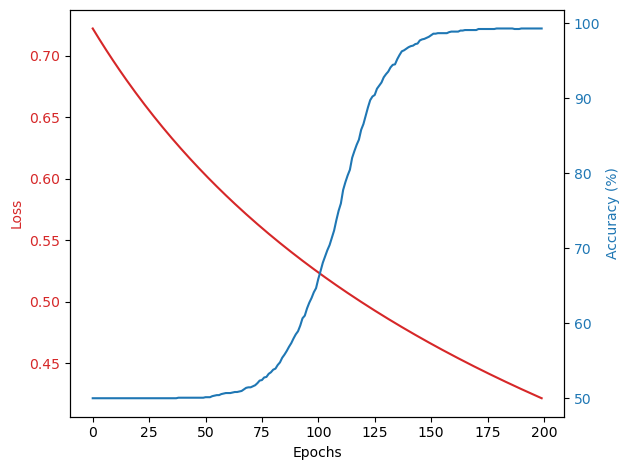

In [100]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(num_epochs), loss_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(range(num_epochs), [acc * 100 for acc in accuracy_history], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Testing
After training, test your model on test dataset and compute performance metrics. 

In [101]:
# Make predictions on the test data
X_val = X_val.to(model.hidden_layer.weight.dtype)
outputs = model(X_val)
predictions = (outputs > 0.5).float()

# Compute performance metrics
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions, average='macro')
recall = recall_score(y_val, predictions, average='macro')
f1score = f1_score(y_val, predictions, average='macro')

# Print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1score)

Accuracy: 0.92
Precision: 0.7799145299145299
Recall: 0.7194713328369322
F1 Score: 0.7447916666666666


Show confusion matrix of your model.

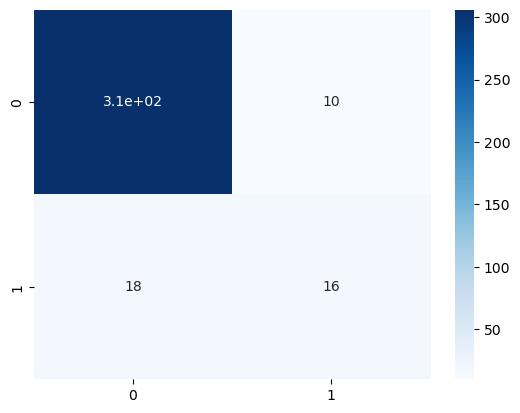

In [102]:
cm = confusion_matrix(y_val, predictions)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()